In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Question 1**

### **Part 1**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

dataset1 = pd.read_csv("/content/drive/MyDrive/prml/lab-7/anneal.data", header=None,names=['family', 'product-type', 'steel', 'carbon', 'hardness', 'temper_rolling', 'condition', 'formability', 'strength', 'non-ageing', 'surface-finish', 'surface-quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl', 'm', 'chrom', 'phos', 'cbond', 'marvi', 'exptl', 'ferro', 'corr', 'blue/bright/varn/clean', 'lustre', 'jurofm', 's', 'p', 'shape', 'thick', 'width', 'len', 'oil', 'bore', 'packing', 'classes'])
dataset1.head()

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3


In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   family                  798 non-null    object 
 1   product-type            798 non-null    object 
 2   steel                   798 non-null    object 
 3   carbon                  798 non-null    int64  
 4   hardness                798 non-null    int64  
 5   temper_rolling          798 non-null    object 
 6   condition               798 non-null    object 
 7   formability             798 non-null    object 
 8   strength                798 non-null    int64  
 9   non-ageing              798 non-null    object 
 10  surface-finish          798 non-null    object 
 11  surface-quality         798 non-null    object 
 12  enamelability           798 non-null    object 
 13  bc                      798 non-null    object 
 14  bf                      798 non-null    ob

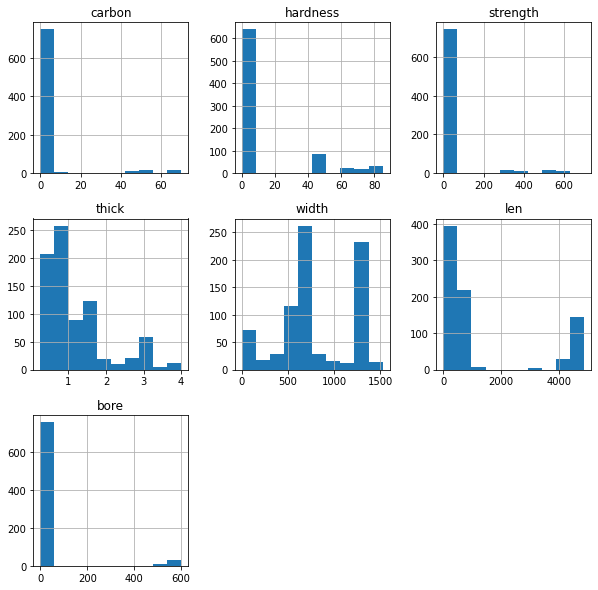

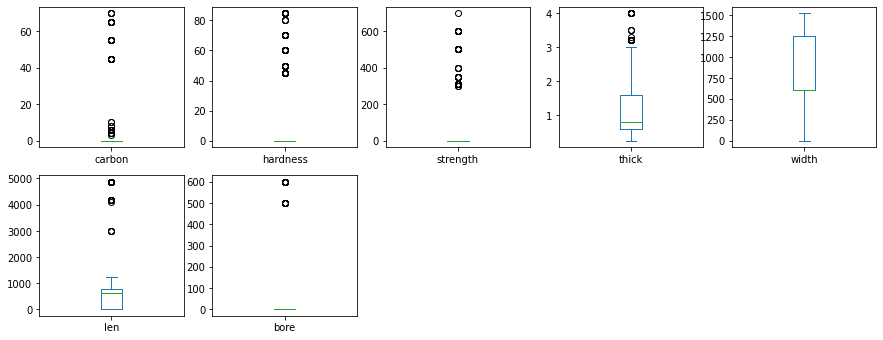

In [ ]:
# Visualize the data using histograms and box plots
dataset1.hist(figsize=(10,10))
plt.show()
dataset1.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(15,15))
plt.show()

### **Part 2**

In [ ]:
dataset1 = dataset1.replace('?',np.nan)
print(dataset1.isnull().sum())

family                    687
product-type                0
steel                      70
carbon                      0
hardness                    0
temper_rolling            675
condition                 271
formability               283
strength                    0
non-ageing                703
surface-finish            790
surface-quality           217
enamelability             785
bc                        797
bf                        680
bt                        736
bw/me                     609
bl                        662
m                         798
chrom                     775
phos                      791
cbond                     730
marvi                     798
exptl                     796
ferro                     772
corr                      798
blue/bright/varn/clean    793
lustre                    753
jurofm                    798
s                         798
p                         798
shape                       0
thick                       0
width     

In [ ]:
dataset1 = dataset1.drop(['family', 'temper_rolling', 'non-ageing', 'surface-finish', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl', 'm','chrom', 'phos', 'cbond','marvi','exptl', 'ferro','corr', 'blue/bright/varn/clean', 'lustre','jurofm','s','p', 'oil', 'packing'], axis=1)

In [ ]:
#Filling missing vlues in columns
col = ['surface-quality','steel','formability','condition']

for c in col:
  dataset1[c]= dataset1[c].fillna(dataset1[c].value_counts().idxmax())

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = ['surface-quality','condition','steel','product-type','shape','classes']

for col in le:
  lbcode = LabelEncoder()
  dataset1[col] = lbcode.fit_transform(dataset1[col])
dataset1

,product-type,steel,carbon,hardness,condition,formability,strength,surface-quality,shape,thick,width,len,bore,classes
0,0,0,8,0,1,2,0,3,0,0.700,610.0,0,0,2
1,0,3,0,0,1,2,0,1,0,3.200,610.0,0,0,2
2,0,3,0,0,1,2,0,1,1,0.700,1300.0,762,0,2
3,0,0,0,60,1,2,0,3,0,2.801,385.1,0,0,2
4,0,0,0,60,1,2,0,3,1,0.801,255.0,269,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,0,0,0,50,1,2,0,3,0,1.001,50.0,0,0,2
794,0,0,0,0,1,1,0,3,1,0.699,1300.0,4880,0,2
795,0,0,0,0,1,2,0,1,0,0.400,609.9,0,0,2
796,0,0,0,0,1,2,0,3,1,3.200,610.0,4880,0,2


In [ ]:
dataset1['formability'] = dataset1['formability'].astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

X_que1 = dataset1.drop('classes', axis=1)
y_que1 = dataset1['classes']

# Split the data into training and testing sets
X_train_que1, X_test_que1, y_train_que1, y_test_que1 = train_test_split(X_que1, y_que1, test_size=0.35, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_que1.select_dtypes(include=np.number))
X_test_std = scaler.transform(X_test_que1.select_dtypes(include=np.number))

### **Part 3**

SVM: 
Mean accuracy: 0.7548 
Std deviation: 0.0040
SVM: 
Mean accuracy std: 0.8417 
Std deviation: 0.0246


Random Forest: 
Mean accuracy: 0.8552 
Std deviation: 0.0194
Random Forest: 
Mean accuracy std: 0.8552 
Std deviation: 0.0194


KNN: 
Mean accuracy: 0.7492 
Std deviation: 0.0331
KNN: 
Mean accuracy std: 0.8361 
Std deviation: 0.0399




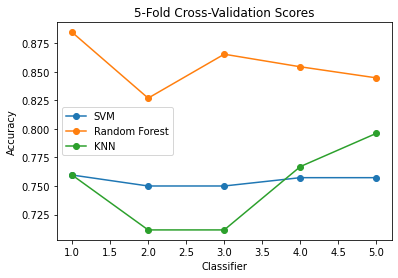

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

# Define the models
models = []
models.append(('SVM', SVC()))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))

# Evaluate each model using 5-fold cross-validation
results = []
results_std=[]
names = []
for name, model in models:
    # kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train_que1, y_train_que1, cv=5)
    results.append(cv_results)
    cv_results_std = cross_val_score(model, X_train_std, y_train_que1, cv=5)
    results_std.append(cv_results_std)
    names.append(name)
    print(f'{name}: \nMean accuracy: {cv_results.mean():.4f} \nStd deviation: {cv_results.std():.4f}')
    print(f'{name}: \nMean accuracy std: {cv_results_std.mean():.4f} \nStd deviation: {cv_results_std.std():.4f}')
    print("\n")
 
# Plot the results
plt.plot(range(1,6), results[0], '-o', label=names[0])
plt.plot(range(1,6), results[1], '-o', label=names[1])
plt.plot(range(1,6), results[2], '-o', label=names[2])
plt.title('5-Fold Cross-Validation Scores')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


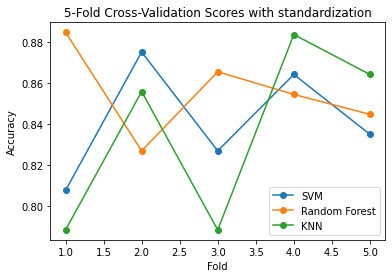

In [ ]:
plt.plot(range(1,6), results_std[0], '-o', label=names[0])
plt.plot(range(1,6), results_std[1], '-o', label=names[1])
plt.plot(range(1,6), results_std[2], '-o', label=names[2])
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross-Validation Scores with standardization')
plt.legend()
plt.show()

### **Part 4**

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

class MyPCA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.mean = None
        self.std = None
        self.eigenvectors = None
        self.eigenvalues = None
        self.components = None
        
    def fit_transform(self, X):
        # # Check for and remove rows with NaN or inf values
        # X = X[np.isfinite(X).all(axis=1)]

        # Center the data
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        X_centered = X - np.mean(X, axis=0)
        
        # Compute the covariance matrix
        cov = np.cov(X_centered.T)
        
        # Compute eigenvectors and eigenvalues
        self.eigenvalues, self.eigenvectors = np.linalg.eig(cov)
        
        # Sort eigenvectors by descending eigenvalues
        idxs = self.eigenvalues.argsort()[::-1]
        self.eigenvalues = self.eigenvalues[idxs]
        self.eigenvectors = self.eigenvectors[:, idxs]
        
        # Compute principal components
        if self.n_components is not None:
            self.components = self.eigenvectors[:, :self.n_components]
        else:
            self.components = self.eigenvectors
            
        # Transform data to new coordinates
        X_transformed = np.dot(X_centered, self.components)
        
        return X_transformed
    
    def transform(self, X):
        # Check for and remove rows with NaN or inf values
        # X = X[np.isfinite(X).all(axis=1)]

        # Center the data
        X_centered = X - np.mean(X, axis=0)
        
        # Transform data to new coordinates
        X_transformed = np.dot(X_centered, self.components)
        
        return X_transformed


### **Part 5**

Explained Variance:  [0.17469715 0.31382663 0.4354706  0.54638578 0.64326063 0.71591599
 0.78551358 0.84659218 0.89240239 0.93676016 0.97277021 1.
 1.        ]


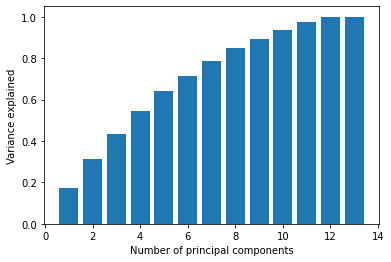

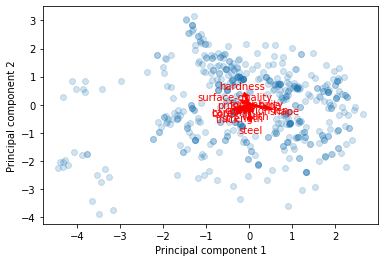

In [ ]:
# Perform PCA
pca = MyPCA()
X_pca = pca.fit_transform(X_train_std)

# Compute variance explained
variance_explained = np.cumsum(pca.eigenvalues) / np.sum(pca.eigenvalues)
print("Explained Variance: ", variance_explained)
# Plot variance explained
plt.bar(range(1, len(variance_explained) + 1), variance_explained)
plt.xlabel('Number of principal components')
plt.ylabel('Variance explained')
plt.show()

# Plot eigenvectors and data
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
for i, (eigenvector, feature) in enumerate(zip(pca.eigenvectors[:, :2], X_que1.columns)):
    plt.arrow(0, 0, eigenvector[0], eigenvector[1], width=0.05, head_width=0.15, head_length=0.15,
              length_includes_head=True, color='r')
    plt.text(eigenvector[0] * 1.5, eigenvector[1] * 1.5, feature, color='r', ha='center', va='center')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()


### **Part 6**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def cross_val_randomforest(X,y):
    models_rf = []
    accuracy_rf = []
    kf = KFold(n_splits=10, random_state=123, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=123)
        clf.fit(X_train, y_train)
        models_rf.append(clf)
        y_pred = clf.predict(X_test)
        accuracy_rf.append(accuracy_score(y_test,y_pred))
    best_model_rf = models_rf[np.argmax(accuracy_rf)]
    return best_model_rf,models_rf,accuracy_rf
def cross_val_dt(X,y):
    models = []
    accuracies = []
    kf = KFold(n_splits=10, random_state=123, shuffle=True)
    for train_idx, test_idx in kf.split(X, y):
        X_train, X_test = X.iloc[train_idx,:], X.iloc[test_idx,:]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        clf = DecisionTreeClassifier(random_state=1)
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        models.append(clf)
        accuracies.append(acc)
    return models,accuracies

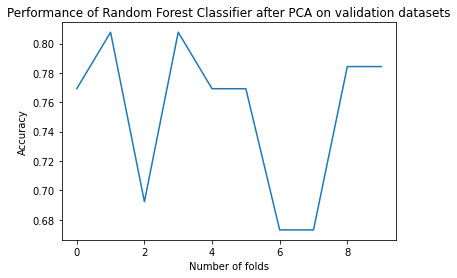

In [ ]:
best_rf_model_pca, models_rf_pca, accuracy_rf_pca = cross_val_randomforest(pd.DataFrame(X_pca), y_que1)
plt.plot(accuracy_rf_pca)
plt.title("Performance of Random Forest Classifier after PCA on validation datasets")
plt.ylabel('Accuracy')
plt.xlabel('Number of folds')
plt.show()

models_dt_pca, accuracy_dt_pca = cross_val_dt(pd.DataFrame(X_pca), y_train_que1)
models_dt,accuracy_dt = cross_val_dt(X_que1,y_que1)

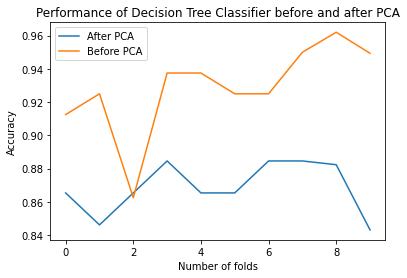

Average accuracy of Decision Tree before PCA:  0.9286392405063291
Average Accuracy of Decision Tree after PCA:  0.8687028657616894


In [ ]:
plt.plot(accuracy_dt_pca, label='After PCA')
plt.plot(accuracy_dt, label='Before PCA')
plt.legend()
plt.title('Performance of Decision Tree Classifier before and after PCA')
plt.ylabel('Accuracy')
plt.xlabel('Number of folds')
plt.show()

print('Average accuracy of Decision Tree before PCA: ', np.array(accuracy_dt).mean())
print("Average Accuracy of Decision Tree after PCA: ", np.array(accuracy_dt_pca).mean())


### **Part 7**

2

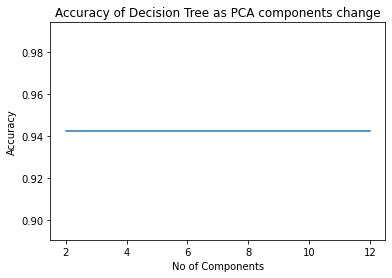

In [ ]:
def find_optimum_components(X,y):
  accuracy_pca = []
  for i in range(2,X.shape[1]):
    pca = MyPCA()
    x_reduced = pca.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(pd.DataFrame(x_reduced), y, train_size = 0.65, random_state = 42)
    models_rf_pca,accuracy_rf_pca = cross_val_dt(x_train,y_train)
    accuracy_pca.append(np.array(accuracy_rf_pca).max())
  plt.plot(range(2,X.shape[1]),accuracy_pca)
  plt.title('Accuracy of Decision Tree as PCA components change')
  plt.ylabel('Accuracy')
  plt.xlabel('No of Components')
  return np.argmax(np.array(accuracy_pca))+2

find_optimum_components(X_que1, y_que1)

## **Question 2**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LD
from sklearn.model_selection import train_test_split

dataset2 = pd.read_csv("/content/drive/MyDrive/prml/lab-7/wine.csv", header=None,names=['Classes','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])
dataset2.head()

,Classes,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Classes                       178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [ ]:
X_que2 = dataset2.drop("Classes", axis=1)
y_que2 = dataset2["Classes"]

# Scale the data
scaler = StandardScaler()
X_scaled_que2 = scaler.fit_transform(X_que2)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_que2, y_que2, test_size=0.2, random_state=42)

### **Part 1**

In [ ]:
class LDA:
    
    def __init__(self):
        pass
    
    #Function to compute within-class and between-class scatter matrices
    def scatter_matrices(self, X, y):

        # Total number of samples
        n_samples = X.shape[0]
        # Number of classes
        n_classes = len(np.unique(y))
        # Mean of each class
        class_means = np.zeros((n_classes, X.shape[1]))

        for c in range(n_classes):
            class_means[c, :] = np.mean(X[y == c+1, :], axis=0)
        # Overall mean
        overall_mean = np.mean(X, axis=0)

        # Initialize within-class and between-class scatter matrices
        S_W = np.zeros((X.shape[1], X.shape[1]))
        S_B = np.zeros((X.shape[1], X.shape[1]))

        # Compute within-class and between-class scatter matrices
        for c in range(n_classes):
            # Scatter matrix for class c
            class_scatter = np.zeros((X.shape[1], X.shape[1]))
            for x in X[y == c+1, :]:
                x = x.reshape(-1, 1)
                class_mean = class_means[c, :].reshape(-1, 1)
                class_scatter += (x - class_mean).dot((x - class_mean).T)
            S_W += class_scatter
            between_class = n_samples * (class_means[c, :] - overall_mean).reshape(-1, 1).dot((class_means[c, :] - overall_mean).reshape(-1, 1).T)
            S_B += between_class
        return S_W, S_B
    
    #Function to automatically select number of linear discriminants
    def select_dimensions(self, X, y, var_retained):

        # Compute scatter matrices
        S_W, S_B = self.scatter_matrices(X, y)

        # Compute eigenvalues and eigenvectors of the matrix S_W^-1 * S_B
        eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

        # Sort eigenvalues in decreasing order and corresponding eigenvectors
        sorted_indices = np.argsort(eig_vals)[::-1]
        eig_vals = eig_vals[sorted_indices]
        eig_vecs = eig_vecs[:, sorted_indices]

        # Compute percentage of variance explained by each linear discriminant
        var_exp = np.cumsum(eig_vals) / np.sum(eig_vals)

        # Find number of linear discriminants needed to retain desired percentage of variance
        n_dimensions = np.argmax(var_exp >= var_retained) + 1
        return eig_vecs[:, :n_dimensions]



### **Part 2**

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


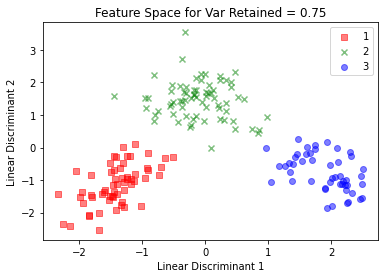

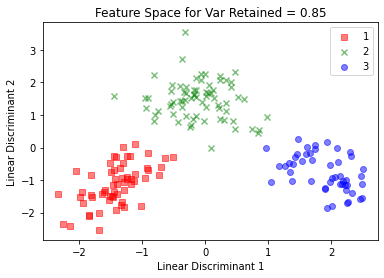

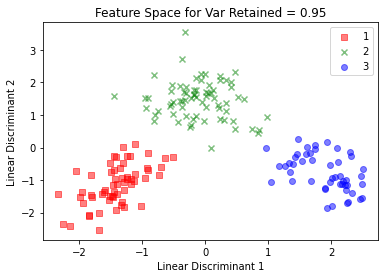

In [ ]:
#Function to vary variance and visualize feature space
# Compute linear discriminants
lda=LDA()
var_retained_values = [0.75, 0.85, 0.95]
for var_retained in var_retained_values:
    # Compute linear discriminants
    W = lda.select_dimensions(X_scaled_que2, y_que2, var_retained)

    # Project data onto selected linear discriminants
    X_lda = X_scaled_que2.dot(W)
    
    # Plot feature space
    colors = ['r', 'g', 'b']
    markers = ['s', 'x', 'o']
    for c, color, marker in zip(np.unique(y_que2), colors, markers):
        plt.scatter(X_lda[y_que2 == c, 0], X_lda[y_que2 == c, 1], c=color, marker=marker, label=c, alpha=0.5)
    plt.xlabel('Linear Discriminant 1')
    plt.ylabel('Linear Discriminant 2')
    plt.title(f'Feature Space for Var Retained = {var_retained}')
    plt.legend()
    plt.show()


### **Part 3**

In [127]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Perform PCA
pca = MyPCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Perform LDA
lda=LD()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train logistic regression models on the PCA and LDA features and compute their accuracy
lr_pca = LogisticRegression()
lr_lda = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)
lr_lda.fit(X_train_lda, y_train)
acc_lr_pca = accuracy_score(y_test, lr_pca.predict(X_test_pca))
acc_lr_lda = accuracy_score(y_test, lr_lda.predict(X_test_lda))

# # Train KNN models on the PCA and LDA features and compute their accuracy
svm_pca = SVC(kernel='linear', C=1)
svm_pca.fit(X_train_pca, y_train)
y_pred_pca = svm_pca.predict(X_test_pca)
acc_svm_pca = accuracy_score(y_test, y_pred_pca)

svm_lda = SVC(kernel='linear', C=1)
svm_lda.fit(X_train_lda, y_train)
y_pred_lda = svm_lda.predict(X_test_lda)
acc_svm_lda = accuracy_score(y_test, y_pred_lda)

# # Print the results
print(f"Logistic Regression with PCA: accuracy = {acc_lr_pca:.2f}")
print(f"Logistic Regression with LDA: accuracy = {acc_lr_lda:.2f}")
print(f"SVM with PCA: accuracy = {acc_svm_pca:.2f}")
print(f"SVM with LDA: accuracy = {acc_svm_lda:.2f}")


Logistic Regression with PCA: accuracy = 1.00
Logistic Regression with LDA: accuracy = 1.00
SVM with PCA: accuracy = 0.97
SVM with LDA: accuracy = 1.00
